In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import tree

In [2]:
data_att = pd.read_csv('general_data.csv')

In [3]:
data_att.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
data_att.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [5]:
df1 = data_att.copy()

In [6]:
df1.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'], axis=1, inplace=True)

In [7]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [9]:
feature_num = []
feature_obj = []
for feature in df1.columns:
    if df1[feature].dtype!='object':
        feature_num.append(feature)
    else:
        feature_obj.append(feature)
print(feature_obj)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']


In [10]:
le = preprocessing.LabelEncoder()

In [11]:
df2 = df1.copy()

In [12]:
for feature in feature_obj:
    df2[feature] = le.fit_transform(df2[feature])

In [13]:
df2[feature_obj]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,0,2,2,1,0,0,1
1,1,1,1,1,0,6,2
2,0,1,1,4,1,7,1
3,0,0,1,1,1,1,1
4,0,2,1,3,1,7,2
...,...,...,...,...,...,...,...
4405,0,2,1,3,0,6,2
4406,0,2,1,3,1,2,0
4407,0,2,1,1,1,7,1
4408,0,2,2,3,1,2,0


In [14]:
df2

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,2,1,5,4,3,0,1,6,2,60290,3.0,17,1,10.0,5,3,0,2
4406,29,0,2,1,2,4,3,1,1,2,0,26790,2.0,15,0,10.0,2,3,0,2
4407,25,0,2,1,25,2,1,1,2,7,1,37020,0.0,20,0,5.0,4,4,1,2
4408,42,0,2,2,18,2,3,1,1,2,0,23980,0.0,14,1,10.0,2,9,7,8


In [15]:
df2.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [16]:
df2.dropna(inplace=True)

In [17]:
y = df2['Attrition']
x = df2.drop(['Attrition'], axis=1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

**Selecting features with highest value**

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_model = RandomForestClassifier(n_estimators = 1000, max_features=2, oob_score = True)

In [21]:
y_train = y_train

In [22]:
rf_model.fit(X= x_train, y=y_train)

RandomForestClassifier(max_features=2, n_estimators=1000, oob_score=True)

In [23]:
print("The Accuracy Score for the model is ", rf_model.oob_score_)

The Accuracy Score for the model is  0.9859797848059993


In [24]:
importance = []
for feature, imp in zip(x_train.columns.tolist(), rf_model.feature_importances_):
    importance.append(imp)
    print(feature,':          ', round(imp*100,3))

Age :           9.137
BusinessTravel :           2.75
Department :           2.549
DistanceFromHome :           7.047
Education :           4.122
EducationField :           4.133
Gender :           1.897
JobLevel :           3.682
JobRole :           5.618
MaritalStatus :           4.087
MonthlyIncome :           9.641
NumCompaniesWorked :           5.711
PercentSalaryHike :           6.548
StockOptionLevel :           3.431
TotalWorkingYears :           8.428
TrainingTimesLastYear :           4.432
YearsAtCompany :           7.009
YearsSinceLastPromotion :           4.346
YearsWithCurrManager :           5.433


In [25]:
sorted(importance,reverse=True)[0:6]

[0.09640880631688857,
 0.09136788980466726,
 0.08428308505763797,
 0.07046571157722167,
 0.0700939564436636,
 0.0654782761332512]

*Here we can see that there are 3 values with highest importance: Age, MonthlyIncome,TotalWorkingYears*

**Visualizing the Decision Tree with the selected elements**

In [26]:
tree_model = tree.DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10)

In [27]:
final_features = x_train[['Age','MonthlyIncome','TotalWorkingYears']]

In [28]:
tree_model.fit(X= final_features, y = y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10)

In [29]:
with open('Dtree_Attrition.dot','w') as f:
    f = tree.export_graphviz(tree_model, feature_names = ['Age','MonthlyIncome','TotalWorkingYears'], out_file =f)

In [30]:
tree_model.score(X = final_features, y=y_train)

0.8620802086729703

**Grpahviz Illustration displaying the Rules**

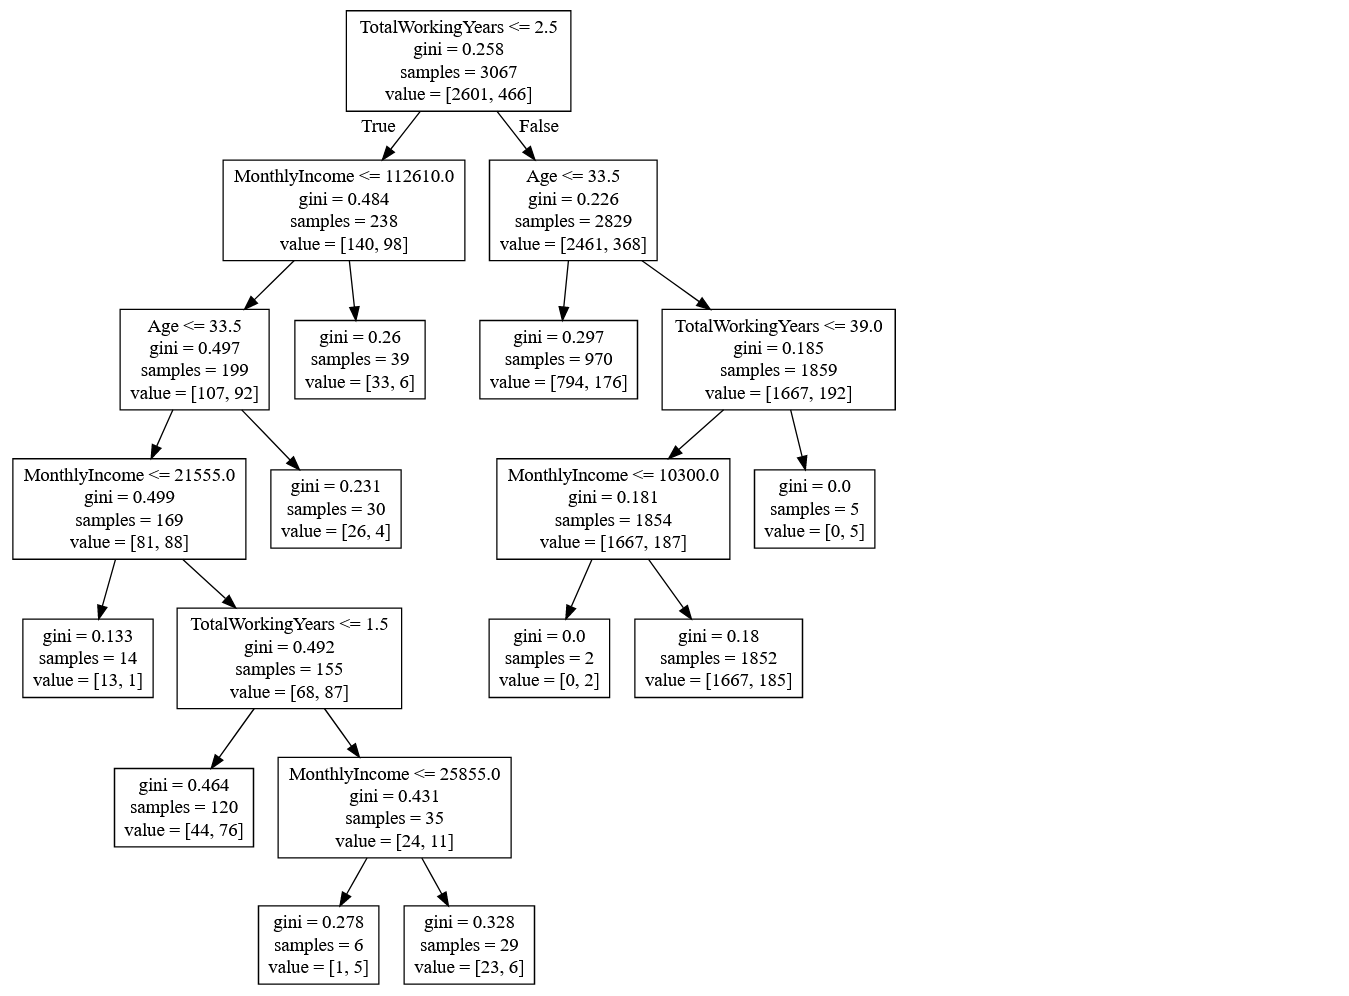